In [1]:
import pandas as pd
import numpy as np
import os
import plotnine
from plotnine import *
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
url= "/Users/seanyoo/Desktop/annual_deaths_by_causes.csv"
df = pd.read_csv(url)
df.tail()

,country,code,year,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,...,chronic_kidney_disease,poisonings,protein_energy_malnutrition,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis
7268,Zimbabwe,ZWE,2015,1439.0,754.0,215.0,3019.0,2518.0,770.0,1302.0,...,2108.0,381.0,2990.0,NaN,2373.0,2751.0,1956.0,4202.0,632.0,146.0
7269,Zimbabwe,ZWE,2016,1457.0,767.0,219.0,3056.0,2050.0,801.0,1342.0,...,2160.0,393.0,3027.0,NaN,2436.0,2788.0,1962.0,4264.0,648.0,146.0
7270,Zimbabwe,ZWE,2017,1460.0,781.0,223.0,2990.0,2116.0,818.0,1363.0,...,2196.0,398.0,2962.0,0.0,2473.0,2818.0,2007.0,4342.0,654.0,144.0
7271,Zimbabwe,ZWE,2018,1450.0,795.0,227.0,2918.0,2088.0,825.0,1396.0,...,2240.0,400.0,2890.0,NaN,2509.0,2849.0,2030.0,4377.0,657.0,139.0
7272,Zimbabwe,ZWE,2019,1450.0,812.0,232.0,2884.0,2068.0,827.0,1434.0,...,2292.0,405.0,2855.0,NaN,2554.0,2891.0,2065.0,4437.0,662.0,136.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7273 entries, 0 to 7272
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               7273 non-null   object 
 1   code                                  6206 non-null   object 
 2   year                                  7273 non-null   int64  
 3   meningitis                            6840 non-null   float64
 4   alzheimer's_diesease                  6840 non-null   float64
 5   parkinson's_disease                   6840 non-null   float64
 6   nutritional_deficiency                6840 non-null   float64
 7   malaria                               6840 non-null   float64
 8   drowning                              6840 non-null   float64
 9   interpersonal_violence                6840 non-null   float64
 10  maternal_disorders                    6840 non-null   float64
 11  hiv/aids         

In [4]:
my_list = list(df)
my_list

['country',
 'code',
 'year',
 'meningitis',
 "alzheimer's_diesease",
 "parkinson's_disease",
 'nutritional_deficiency',
 'malaria',
 'drowning',
 'interpersonal_violence',
 'maternal_disorders',
 'hiv/aids',
 'drug_use_disorders',
 'tuberculosis',
 'cardiovascular_diseases',
 'lower_respiratory_infections',
 'neonatal_disorders',
 'alcohol_use_disorders',
 'self_harm',
 'exposure_to_forces_of_nature',
 'diarrheal_diseases',
 'environmental_heat_and_cold_exposure',
 'neoplasms',
 'conflict_and_terrorism',
 'diabetes_mellitus',
 'chronic_kidney_disease',
 'poisonings',
 'protein_energy_malnutrition',
 'terrorism',
 'road_injuries',
 'chronic_respiratory_diseases',
 'chronic_liver_diseases',
 'digestive_diseases',
 'fire_heat_hot_substance',
 'acute_hepatitis']

In [5]:
df_country = df.groupby(["code"]).sum().reset_index()
df_country ["Total_death"] = df_country .iloc[:, 3:35].sum(axis=1, numeric_only= True)
df_country = df_country.iloc[:, [0, 34]]
df_country =df_country.sort_values(by=['Total_death'], ascending= False)
df_country.head(10)
df_country = df_country.iloc[1: , :]
df_country = df_country.iloc[0:10,]
df_country.loc[:, "Death(million)"] = df_country["Total_death"] / 1000000
df_country

,code,Total_death,Death(million)
34,CHN,264928195.0,264.928195
86,IND,236165431.0,236.165431
204,USA,71161305.0,71.161305
166,RUS,59534944.0,59.534944
85,IDN,43710356.0,43.710356
137,NGA,42172312.0,42.172312
151,PAK,37422332.0,37.422332
25,BRA,32537536.0,32.537536
95,JPN,31908522.0,31.908522
47,DEU,25549665.0,25.549665


In [6]:
df2 = df_country.loc[: ,["code", "Death(million)"]]
df2

,code,Death(million)
34,CHN,264.928195
86,IND,236.165431
204,USA,71.161305
166,RUS,59.534944
85,IDN,43.710356
137,NGA,42.172312
151,PAK,37.422332
25,BRA,32.537536
95,JPN,31.908522
47,DEU,25.549665


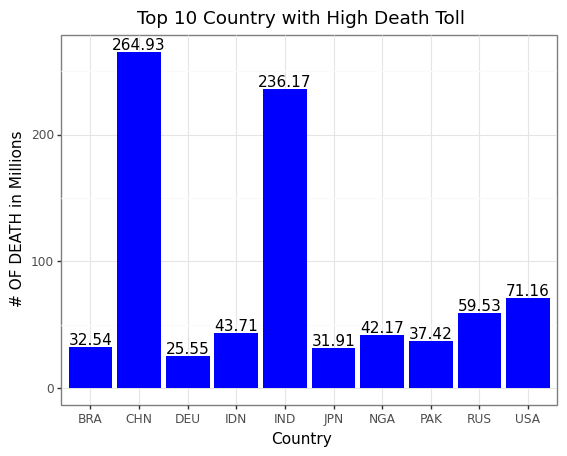

<ggplot: (8777353208549)>

In [7]:
(ggplot(data=df_country.iloc[0:10,], mapping=aes(x='code', y='Death(million)'))+
geom_bar(stat='identity',fill= "blue") + 
xlab("Country")+
ylab("# OF DEATH in Millions")+
ggtitle("Top 10 Country with High Death Toll") + 
 geom_text(mapping=aes(label="Death(million)"),
           #this means the string in the text we are adding has 2 decimals only
           format_string='{:.2f}',
           #this makes sure that each label is separated and goes to each bar
           position=position_dodge(width=0.9),
                  va="bottom")+
theme_bw()
)

In [16]:
df_country.head(10)
df_country.loc[:, "avg_pop"] = [1425887337, 1413310779, 332403650,146087801,280608335,218675799, 231426001,  216259733, 125527995, 84441303   ]




In [21]:
df_country.loc[:, "avg_death"] = df_country["Total_death"]/29
df_country.loc[:, "death_to_avg_pop"] = df_country["Total_death"]/df_country["avg_pop"]
df_country

,code,Total_death,Death(million),avg_death,avg_pop,death_to_avg_pop
34,CHN,264928195.0,264.928195,9.135455e+06,1425887337,0.185799
86,IND,236165431.0,236.165431,8.143636e+06,1413310779,0.167101
204,USA,71161305.0,71.161305,2.453838e+06,332403650,0.214081
166,RUS,59534944.0,59.534944,2.052929e+06,146087801,0.407529
85,IDN,43710356.0,43.710356,1.507254e+06,280608335,0.155770
137,NGA,42172312.0,42.172312,1.454218e+06,218675799,0.192853
151,PAK,37422332.0,37.422332,1.290425e+06,231426001,0.161703
25,BRA,32537536.0,32.537536,1.121984e+06,216259733,0.150456
95,JPN,31908522.0,31.908522,1.100294e+06,125527995,0.254194
47,DEU,25549665.0,25.549665,8.810229e+05,84441303,0.302573


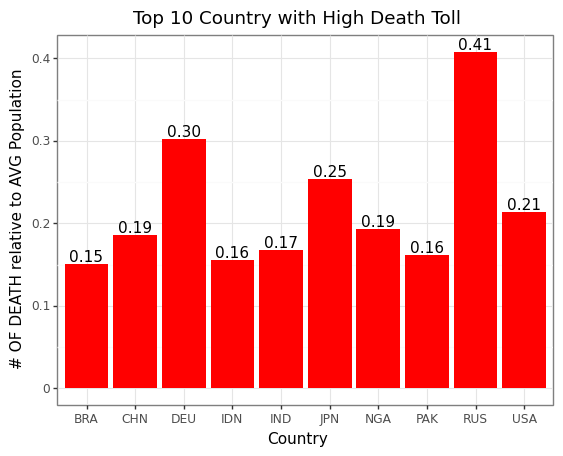

<ggplot: (8777277383069)>

In [22]:
(ggplot(data=df_country.iloc[0:10,], mapping=aes(x='code', y='death_to_avg_pop'))+
geom_bar(stat='identity',fill= "red") +
xlab("Country")+
ylab("# OF DEATH relative to AVG Population")+
ggtitle("Top 10 Country with High Death Toll") + 
  geom_text(mapping=aes(label="death_to_avg_pop"),
           #this means the string in the text we are adding has 2 decimals only
           format_string='{:.2f}',
           #this makes sure that each label is separated and goes to each bar
           position=position_dodge(width=0.9),
                  va="bottom")+
theme_bw()
)

In [33]:
df=df.assign(total=0)
col = list(df)
col.remove('country')
col.remove('year')
col.remove('code')
df['total']=df[col].sum(axis=1)
df.drop(df[df['country'] == "World"].index, inplace = True)
df.sort_values(by='total',ascending=False).head(30)
df_disease=df.drop(['country','code','year','total'],axis=1).sum(axis=0)
df_disease=pd.DataFrame(df_disease,columns=['total'])
df_disease.head()

,total
meningitis,45647131.0
alzheimer's_diesease,157378454.0
parkinson's_disease,37232580.0
nutritional_deficiency,61484335.0
malaria,103946290.0


In [34]:
df_disease.index.rename('disease', inplace=True)

df_disease.loc[:, "Yes"] = ['meningitis',
 "alzheimer's_diesease",
 "parkinson's_disease",
 'nutritional_deficiency',
 'malaria',
 'drowning',
 'interpersonal_violence',
 'maternal_disorders',
 'hiv/aids',
 'drug_use_disorders',
 'tuberculosis',
 'cardiovascular_diseases',
 'lower_respiratory_infections',
 'neonatal_disorders',
 'alcohol_use_disorders',
 'self_harm',
 'exposure_to_forces_of_nature',
 'diarrheal_diseases',
 'environmental_heat_and_cold_exposure',
 'neoplasms',
 'conflict_and_terrorism',
 'diabetes_mellitus',
 'chronic_kidney_disease',
 'poisonings',
 'protein_energy_malnutrition',
 'terrorism',
 'road_injuries',
 'chronic_respiratory_diseases',
 'chronic_liver_diseases',
 'digestive_diseases',
 'fire_heat_hot_substance',
 'acute_hepatitis']
df_disease.loc[:, "Death(millions)"] = df_disease["total"] / 1000000
df_disease.reset_index()

,disease,total,Yes,Death(millions)
0,meningitis,4.564713e+07,meningitis,45.647131
1,alzheimer's_diesease,1.573785e+08,alzheimer's_diesease,157.378454
2,parkinson's_disease,3.723258e+07,parkinson's_disease,37.232580
3,nutritional_deficiency,6.148434e+07,nutritional_deficiency,61.484335
4,malaria,1.039463e+08,malaria,103.946290
5,drowning,4.864690e+07,drowning,48.646900
6,interpersonal_violence,5.997605e+07,interpersonal_violence,59.976054
7,maternal_disorders,3.420410e+07,maternal_disorders,34.204098
8,hiv/aids,1.560895e+08,hiv/aids,156.089472
9,drug_use_disorders,1.409471e+07,drug_use_disorders,14.094708


In [35]:

df1 = df_disease.loc[: ,["Death(millions)"]]
df1

,Death(millions)
disease,
meningitis,45.647131
alzheimer's_diesease,157.378454
parkinson's_disease,37.232580
nutritional_deficiency,61.484335
malaria,103.946290
drowning,48.646900
interpersonal_violence,59.976054
maternal_disorders,34.204098
hiv/aids,156.089472


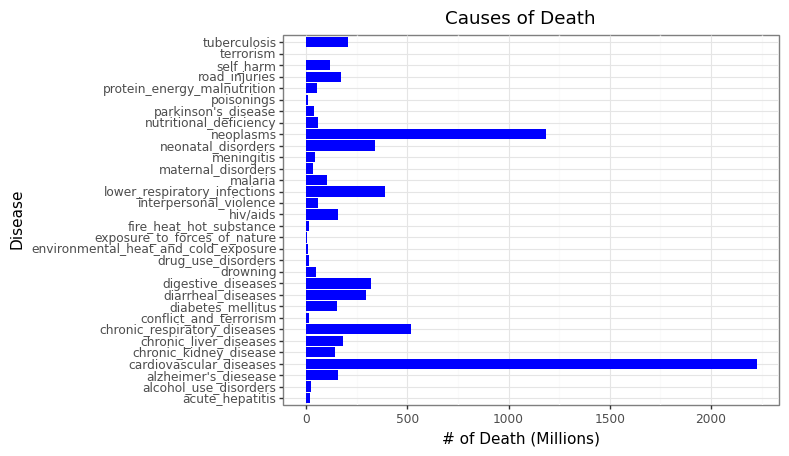

<ggplot: (8777341238312)>

In [36]:
(ggplot(data=df_disease, mapping=aes(x='Yes', y='Death(millions)'))+
geom_bar(stat='identity',fill= "blue") + coord_flip() +
xlab("Disease")+
ylab("# of Death (Millions) ")+
ggtitle("Causes of Death ") + 
theme_bw()
)

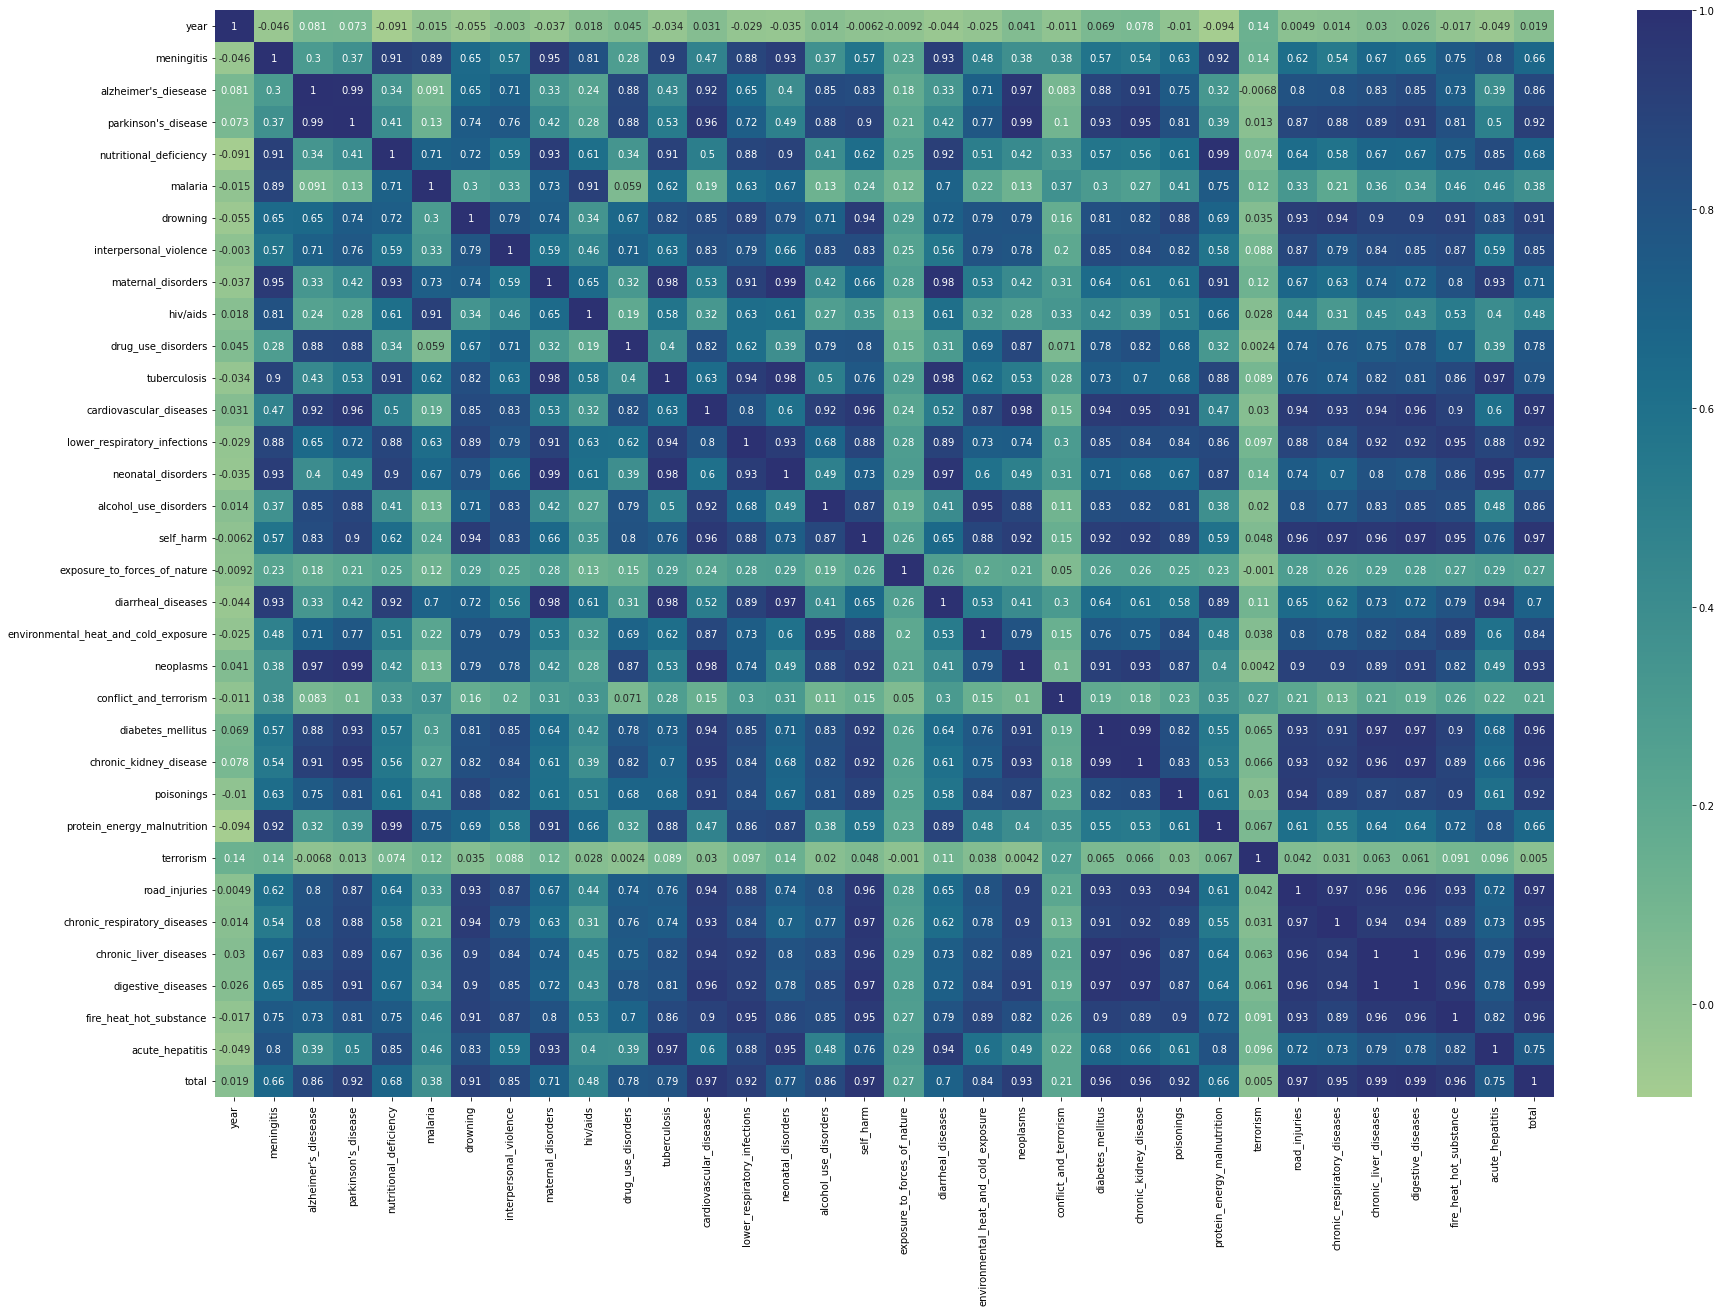

In [37]:
import seaborn as sns
plt.figure(figsize=(30,20))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap="crest")
plt.show()

In [38]:
import pandas as pd
import numpy as np
from plotnine import *
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor as knn

# Cardio and digestive disease


In [39]:
df = df.dropna()
sklearn_knn = knn(n_neighbors=76).fit(X=df[['digestive_diseases']],
                                       y=df['cardiovascular_diseases'])

sklearn_knn.score(X=df[['digestive_diseases']],
                  y=df['cardiovascular_diseases'])



0.7978393797430128

In [40]:
df['pred_knn'] = sklearn_knn.predict(df[['digestive_diseases']])

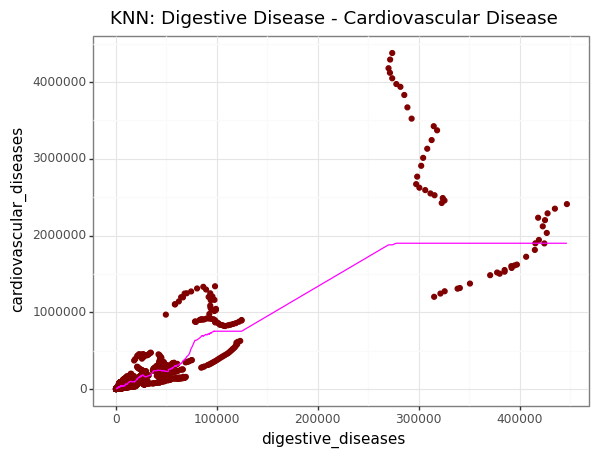

<ggplot: (8777286797770)>

In [41]:
(ggplot(df, aes(x='digestive_diseases', y='cardiovascular_diseases'))+
       geom_point(color='maroon')+
 geom_line(aes(x='digestive_diseases', y='pred_knn'), color='magenta' )+
 ggtitle("KNN: Digestive Disease - Cardiovascular Disease") + 
 theme_bw()
       )

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
cross_val_score(knn(n_neighbors=10),X=df[['neoplasms']],
                y=df['cardiovascular_diseases'],cv=5)

array([ 0.71958639,  0.76562148,  0.46674947,  0.40401336, -0.28907275])

In [44]:
cross_val_score(knn(n_neighbors=10),X=df[['neoplasms']],
                y=df['cardiovascular_diseases'],cv=5).mean()

0.4133795871367679

In [45]:

scoreCV=[cross_val_score(knn(n_neighbors=i),X=df[['neoplasms']],
                y=df['cardiovascular_diseases'],
                         cv=5).mean() for i in list(range(5, 500))]

In [46]:
df_CV=pd.DataFrame(scoreCV, columns=['scores'])
df_CV['neighbors']=list(range(5, 500))

df_CV.head()

,scores,neighbors
0,0.420900,5
1,0.412388,6
2,0.409444,7
3,0.418393,8
4,0.414929,9


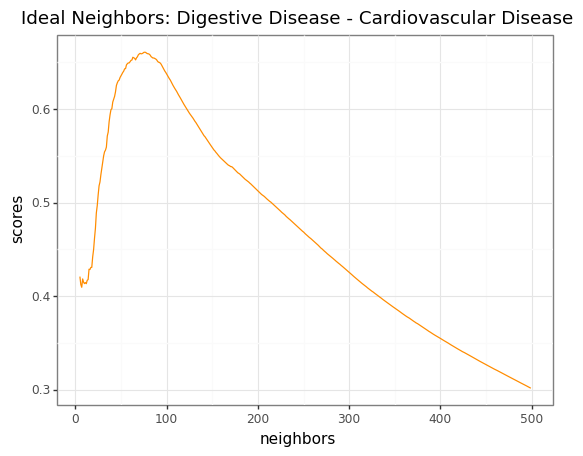

<ggplot: (8777277469248)>

In [47]:
(ggplot(df_CV, aes(x='neighbors', y='scores'))+
 geom_line(color='darkorange')+
 ggtitle("Ideal Neighbors: Digestive Disease - Cardiovascular Disease") + 
theme_bw())

In [48]:
df_CV.scores.max()

0.6608848942925561

In [49]:
df_CV.loc[df_CV['scores']==df_CV.scores.max(), 'neighbors']

71    76
Name: neighbors, dtype: int64

# NeoPlasms and parkin 



In [50]:
sklearn_knn = knn(n_neighbors=42).fit(X=df[["parkinson's_disease"]],
                                       y=df['neoplasms'])

sklearn_knn.score(X=df[["parkinson's_disease"]],
                  y=df['neoplasms'])

0.8829041007553163

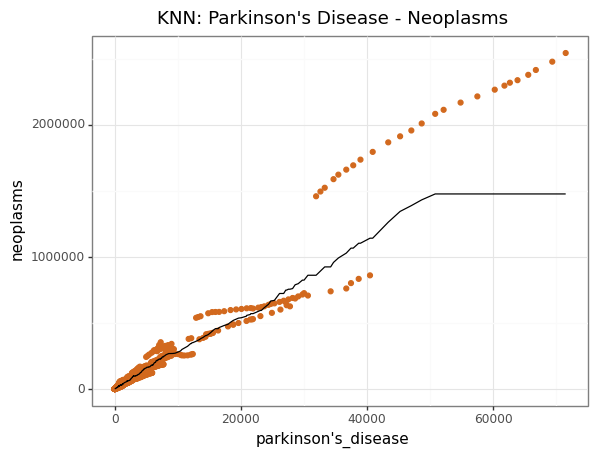

<ggplot: (8777353489149)>

In [51]:
df['pred_knn'] = sklearn_knn.predict(df[["parkinson's_disease"]])


(ggplot(df, aes(x="parkinson's_disease", y='neoplasms'))+
       geom_point(color='chocolate')+
 geom_line(aes(x="parkinson's_disease", y='pred_knn'), color='black' )+
 ggtitle("KNN: Parkinson's Disease - Neoplasms") + 
 theme_bw()
       )

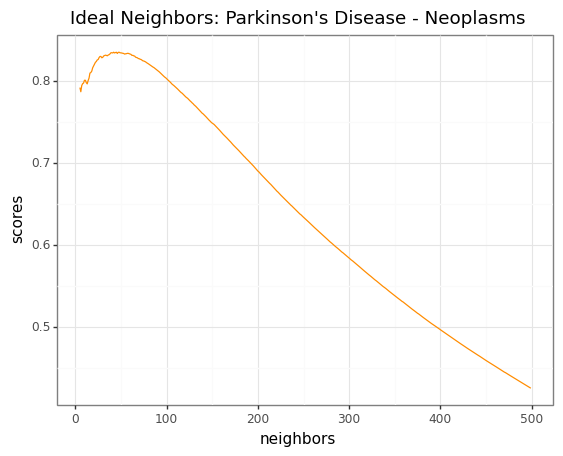

<ggplot: (8777353164201)>

In [52]:
from sklearn.model_selection import cross_val_score

cross_val_score(knn(n_neighbors=42),X=df[["parkinson's_disease"]],
                y=df['neoplasms'],cv=5)


cross_val_score(knn(n_neighbors=42),X=df[["parkinson's_disease"]],
                y=df['neoplasms'],cv=5).mean()


scoreCV=[cross_val_score(knn(n_neighbors=i),X=df[["parkinson's_disease"]],
                y=df['neoplasms'],
                         cv=5).mean() for i in list(range(5, 500))]

df_CV=pd.DataFrame(scoreCV, columns=['scores'])
df_CV['neighbors']=list(range(5, 500))

df_CV.head()

(ggplot(df_CV, aes(x='neighbors', y='scores'))+
 geom_line(color='darkorange')+
  ggtitle("Ideal Neighbors: Parkinson's Disease - Neoplasms") + 
theme_bw())

In [53]:
df_CV.scores.max()
df_CV.loc[df_CV['scores']==df_CV.scores.max(), 'neighbors']

37    42
Name: neighbors, dtype: int64

# NEO AND ALZ

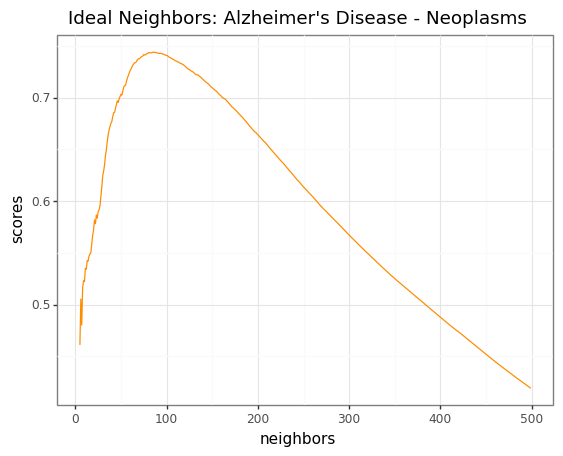

<ggplot: (8777353824579)>

In [54]:
from sklearn.model_selection import cross_val_score

cross_val_score(knn(n_neighbors=10),X=df[["alzheimer's_diesease"]],
                y=df['neoplasms'],cv=5)


cross_val_score(knn(n_neighbors=10),X=df[["alzheimer's_diesease"]],
                y=df['neoplasms'],cv=5).mean()


scoreCV=[cross_val_score(knn(n_neighbors=i),X=df[["alzheimer's_diesease"]],
                y=df['neoplasms'],
                         cv=5).mean() for i in list(range(5, 500))]

df_CV=pd.DataFrame(scoreCV, columns=['scores'])
df_CV['neighbors']=list(range(5, 500))

df_CV.head()

(ggplot(df_CV, aes(x='neighbors', y='scores'))+
 geom_line(color='darkorange')+
  ggtitle("Ideal Neighbors: Alzheimer's Disease - Neoplasms") + 
theme_bw())

In [55]:
df_CV.scores.max()
df_CV.loc[df_CV['scores']==df_CV.scores.max(), 'neighbors']

80    85
Name: neighbors, dtype: int64

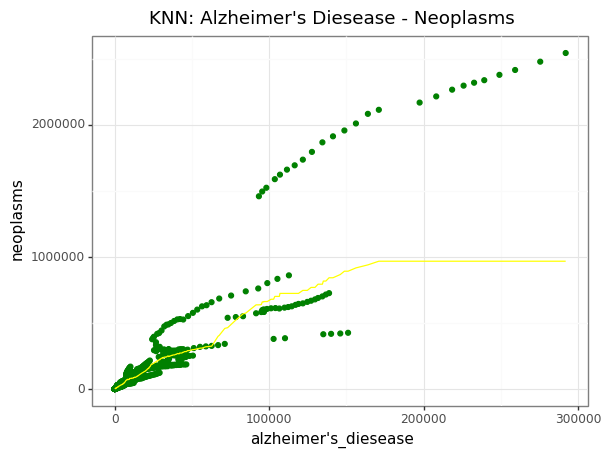

<ggplot: (8777323884421)>

In [56]:
sklearn_knn = knn(n_neighbors=85).fit(X=df[["alzheimer's_diesease"]],
                                       y=df['neoplasms'])



df['pred_knn'] = sklearn_knn.predict(df[["alzheimer's_diesease"]])


(ggplot(df, aes(x="alzheimer's_diesease", y='neoplasms'))+
       geom_point(color='green')+
 geom_line(aes(x="alzheimer's_diesease", y='pred_knn'), color='yellow' )+
  ggtitle("KNN: Alzheimer's Diesease - Neoplasms") + 
 theme_bw()
       )



In [57]:
# Cardio and self- harm 


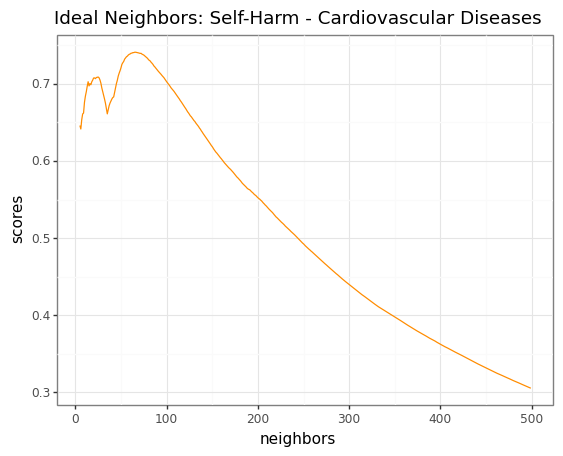

<ggplot: (8777277532694)>

In [58]:
from sklearn.model_selection import cross_val_score

cross_val_score(knn(n_neighbors=10),X=df[["self_harm"]],
                y=df['cardiovascular_diseases'],cv=5)


cross_val_score(knn(n_neighbors=10),X=df[["self_harm"]],
                y=df['cardiovascular_diseases'],cv=5).mean()


scoreCV=[cross_val_score(knn(n_neighbors=i),X=df[["self_harm"]],
                y=df['cardiovascular_diseases'],
                         cv=5).mean() for i in list(range(5, 500))]

df_CV=pd.DataFrame(scoreCV, columns=['scores'])
df_CV['neighbors']=list(range(5, 500))

df_CV.head()

(ggplot(df_CV, aes(x='neighbors', y='scores'))+
 geom_line(color='darkorange')+
 ggtitle("Ideal Neighbors: Self-Harm - Cardiovascular Diseases") +
theme_bw())

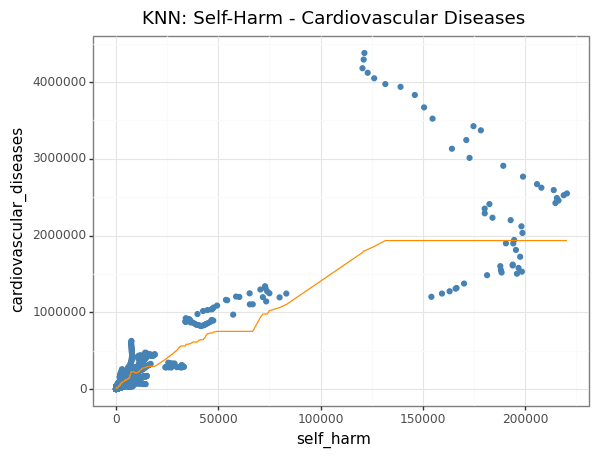

<ggplot: (8777323890631)>

In [59]:
sklearn_knn = knn(n_neighbors=85).fit(X=df[["self_harm"]],
                                       y=df['cardiovascular_diseases'])



df['pred_knn'] = sklearn_knn.predict(df[["self_harm"]])


(ggplot(df, aes(x="self_harm", y='cardiovascular_diseases'))+
       geom_point(color='steelblue')+
 geom_line(aes(x="self_harm", y='pred_knn'), color='darkorange' )+
ggtitle("KNN: Self-Harm - Cardiovascular Diseases") +
 
 theme_bw()
       )


In [60]:

df4 = df[df["code"] == "JPN"]
df4["Total_death"] = df4.iloc[:, 3:35].sum(axis=1, numeric_only= True)
df4

/var/folders/ng/44x5jng1501210_z7y7z7rrh0000gn/T/ipykernel_46120/3555849624.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,country,code,year,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,...,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis,total,pred_knn,Total_death
3061,Japan,JPN,2008,485.0,102846.0,11711.0,1416.0,0.0,6878.0,896.0,...,0.0,8798.0,42712.0,25468.0,50378.0,1807.0,158.0,1124395.0,561141.776471,1124395.0
3062,Japan,JPN,2009,492.0,110223.0,12128.0,1448.0,0.0,7025.0,851.0,...,0.0,8466.0,43555.0,25468.0,51074.0,1773.0,143.0,1142028.0,561141.776471,1142028.0
3065,Japan,JPN,2013,400.0,135021.0,14484.0,1638.0,0.0,7837.0,724.0,...,0.0,7390.0,48711.0,25826.0,55545.0,1889.0,109.0,1241583.0,481348.482353,1241583.0
3066,Japan,JPN,2014,401.0,140066.0,14836.0,1653.0,0.0,7853.0,741.0,...,0.0,7122.0,49376.0,25595.0,55957.0,1638.0,103.0,1250427.0,454070.376471,1250427.0
3067,Japan,JPN,2015,401.0,146012.0,15145.0,1684.0,0.0,7853.0,718.0,...,0.0,6898.0,50295.0,25390.0,56534.0,1589.0,101.0,1264006.0,432360.400000,1264006.0
3068,Japan,JPN,2016,405.0,151061.0,15570.0,1726.0,0.0,7939.0,706.0,...,19.0,6768.0,51590.0,25479.0,57565.0,1573.0,99.0,1285535.0,419765.047059,1285535.0
3069,Japan,JPN,1990,619.0,28440.0,4977.0,606.0,0.0,3606.0,1108.0,...,2.0,15594.0,29862.0,25310.0,41722.0,1580.0,120.0,807559.0,387025.788235,807559.0
3070,Japan,JPN,1991,604.0,30483.0,5192.0,636.0,0.0,3751.0,1060.0,...,1.0,15695.0,30888.0,25569.0,42226.0,1600.0,131.0,824802.0,387025.788235,824802.0
3071,Japan,JPN,1992,592.0,32886.0,5437.0,685.0,0.0,3944.0,1087.0,...,0.0,15774.0,32011.0,25953.0,42970.0,1647.0,146.0,846809.0,387025.788235,846809.0
3073,Japan,JPN,1994,567.0,37851.0,5842.0,813.0,0.0,4462.0,1131.0,...,8.0,15270.0,33302.0,25529.0,43132.0,1706.0,208.0,871018.0,395832.588235,871018.0


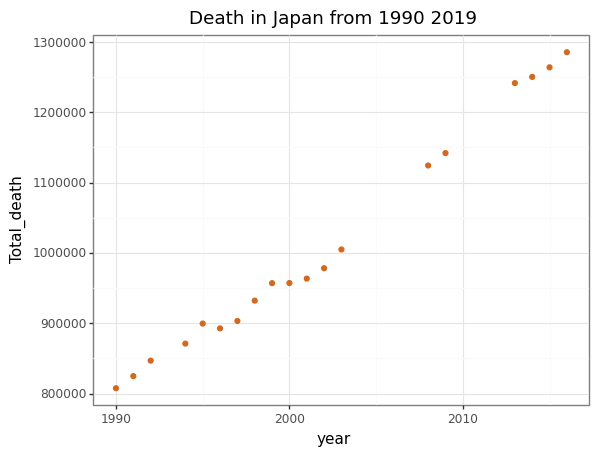

<ggplot: (8777277540395)>

In [61]:
(ggplot(df4, aes(x="year", y='Total_death'))+
geom_point(color='chocolate')+
 ggtitle("Death in Japan from 1990 2019") + 
 theme_bw()
)

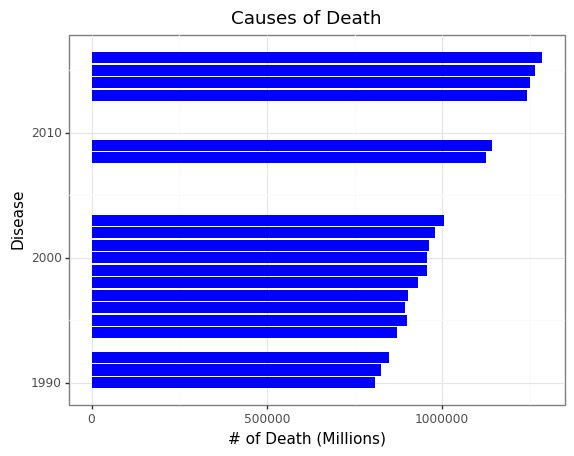

<ggplot: (8777353407711)>

In [62]:
(ggplot(data=df4, mapping=aes(x='year', y='Total_death'))+
geom_bar(stat='identity',fill= "blue") + coord_flip() +
xlab("Disease")+
ylab("# of Death (Millions) ")+
ggtitle("Causes of Death ") + 
theme_bw()
)

In [63]:
df5 = df[df["code"] == "DEU"]
df5["Total_death"] = df5.iloc[:, 3:35].sum(axis=1, numeric_only= True)
df5

/var/folders/ng/44x5jng1501210_z7y7z7rrh0000gn/T/ipykernel_46120/344970412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,country,code,year,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,...,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis,total,pred_knn,Total_death
2388,Germany,DEU,1990,595.0,29984.0,5811.0,210.0,0.0,934.0,1040.0,...,0.0,12388.0,39888.0,22263.0,42169.0,908.0,240.0,890156.0,286861.635294,890156.0
2389,Germany,DEU,1991,566.0,30640.0,5837.0,180.0,0.0,901.0,1110.0,...,10.0,12243.0,39376.0,23277.0,43220.0,900.0,235.0,881534.0,286861.635294,881534.0
2390,Germany,DEU,1992,524.0,31442.0,5842.0,164.0,0.0,858.0,1157.0,...,17.0,11731.0,38572.0,23676.0,43420.0,865.0,222.0,866879.0,286861.635294,866879.0
2392,Germany,DEU,1994,476.0,33246.0,6102.0,151.0,0.0,802.0,1179.0,...,2.0,10761.0,38081.0,24691.0,44587.0,811.0,184.0,864587.0,282190.200000,864587.0
2393,Germany,DEU,1995,451.0,33953.0,6345.0,160.0,0.0,766.0,1158.0,...,10.0,10328.0,37814.0,24919.0,44911.0,793.0,137.0,864521.0,282190.200000,864521.0
2394,Germany,DEU,1996,436.0,34322.0,6556.0,158.0,0.0,715.0,1101.0,...,1.0,9837.0,37048.0,24844.0,44831.0,887.0,125.0,858772.0,280860.976471,858772.0
2395,Germany,DEU,1997,410.0,34603.0,6704.0,159.0,0.0,701.0,1032.0,...,0.0,9318.0,35630.0,24382.0,44163.0,739.0,111.0,844358.0,277207.635294,844358.0
2396,Germany,DEU,1998,383.0,34797.0,6874.0,155.0,0.0,659.0,1040.0,...,0.0,8717.0,34386.0,23791.0,43501.0,706.0,98.0,833801.0,274228.341176,833801.0
2397,Germany,DEU,1999,360.0,35251.0,7078.0,155.0,0.0,652.0,1023.0,...,3.0,8371.0,33596.0,23523.0,43341.0,682.0,78.0,832566.0,271950.188235,832566.0
2398,Germany,DEU,2000,349.0,35327.0,7228.0,161.0,0.0,618.0,924.0,...,1.0,7956.0,32657.0,23133.0,43094.0,660.0,71.0,829942.0,270637.494118,829942.0


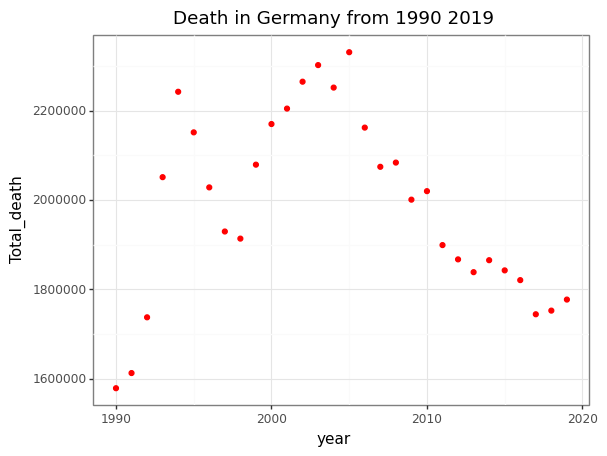

<ggplot: (8777353404495)>

In [64]:
(ggplot(df6, aes(x="year", y='Total_death'))+
geom_point(color='red')+
 ggtitle("Death in Germany from 1990 2019") + 
 theme_bw()
)

In [65]:
df6 = df[df["code"] == "RUS"]
df6["Total_death"] = df6.iloc[:, 3:35].sum(axis=1, numeric_only= True)
df6

/var/folders/ng/44x5jng1501210_z7y7z7rrh0000gn/T/ipykernel_46120/2813219009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,country,code,year,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,...,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis,total,pred_knn,Total_death
5122,Russia,RUS,1992,2253.0,25388.0,6228.0,516.0,0.0,15559.0,41586.0,...,34.0,41484.0,61139.0,19707.0,49407.0,8701.0,152.0,1737526.0,7.514183e+05,1737526.0
5124,Russia,RUS,1994,2803.0,26677.0,7286.0,691.0,0.0,21430.0,63629.0,...,34.0,49102.0,74217.0,30406.0,67981.0,12594.0,173.0,2242181.0,1.101170e+06,2242181.0
5125,Russia,RUS,1995,2689.0,26650.0,7038.0,659.0,0.0,20808.0,61876.0,...,145.0,44806.0,69003.0,30320.0,66385.0,12156.0,173.0,2151340.0,1.061399e+06,2151340.0
5126,Russia,RUS,1996,2387.0,26918.0,6846.0,605.0,0.0,18380.0,52944.0,...,135.0,39482.0,64423.0,28354.0,62300.0,11353.0,168.0,2028218.0,9.771797e+05,2028218.0
5127,Russia,RUS,1997,2203.0,26786.0,6729.0,558.0,0.0,16558.0,47709.0,...,61.0,35532.0,60386.0,26424.0,58632.0,10557.0,166.0,1929534.0,7.514183e+05,1929534.0
5128,Russia,RUS,1998,2112.0,26820.0,6718.0,547.0,0.0,16448.0,46589.0,...,49.0,35166.0,57608.0,26352.0,58314.0,10648.0,166.0,1913612.0,7.514183e+05,1913612.0
5129,Russia,RUS,1999,2230.0,27413.0,7157.0,602.0,0.0,18008.0,52417.0,...,395.0,38627.0,60175.0,29995.0,64587.0,12229.0,177.0,2079054.0,9.771797e+05,2079054.0
5130,Russia,RUS,2000,2315.0,27403.0,7313.0,624.0,0.0,18632.0,54883.0,...,362.0,40948.0,59754.0,33893.0,70085.0,13404.0,179.0,2169960.0,1.020156e+06,2169960.0
5131,Russia,RUS,2001,2362.0,27427.0,7410.0,621.0,0.0,18579.0,55879.0,...,228.0,41819.0,56942.0,37516.0,74493.0,14168.0,170.0,2204534.0,9.771797e+05,2204534.0
5132,Russia,RUS,2002,2380.0,27337.0,7642.0,635.0,0.0,18248.0,56916.0,...,512.0,42555.0,55751.0,42203.0,80375.0,14860.0,153.0,2264719.0,9.771797e+05,2264719.0


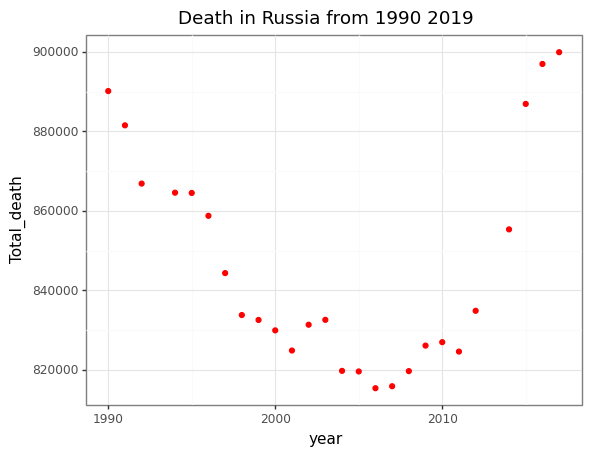

<ggplot: (8777353364794)>

In [66]:
(ggplot(df5, aes(x="year", y='Total_death'))+
geom_point(color='red')+
 ggtitle("Death in Russia from 1990 2019") + 
 theme_bw()
)